In [1]:
import sklearn.svm
from sklearn.metrics import accuracy_score
from ipynb.fs.full.Functions import load_train_test_data, load_train_test_oversampled, run_gridsearchCV, load_model, model_eval, run_randomizedsearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 


# SVM

# 1) SVM with normal preprocessed dataset


In [2]:
# Load the data
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


Age  PhysicallyActive       BMI     Sleep  SoundSleep  JunkFood  Stress  \
188  3.0               0.0 -0.514087 -0.775318   -0.293345       0.0     1.0   
145  0.0               2.0 -1.261602  0.026431   -0.293345       0.0     0.0   
87   3.0               1.0 -2.009116 -2.378816   -0.838128       0.0     2.0   
262  3.0               2.0 -0.887844  0.828180   -0.838128       0.0     1.0   
45   1.0               1.0 -0.887844 -0.775318    0.251438       0.0     1.0   

     BPLevel  Pregnancies  UrinationFreq  BMI_high  highBP_yes  \
188      2.0    -0.416387            0.0         0         1.0   
145      1.0    -0.416387            0.0         0         0.0   
87       2.0    -0.416387            1.0         0         1.0   
262      1.0    -0.416387            1.0         0         1.0   
45       0.0    -0.416387            0.0         0         0.0   

     RegularMedicine_yes  Pdiabetes_yes  Alcohol_yes  Gender_Male  \
188                  1.0            0.0          0.0          1.0   
145                  0.0            0.0          1.0          1.0   
87                   1.0            0.0          0.0          1.0   
262                  1.0            0.0          1.0          1.0   
45                   0.0            0.0          0.0          1.0   

     Smoking_yes  Family_Diabetes_yes  
188          0.0                  0.0  
145          1.0                  1.0  
87           0.0                  0.0  
262          0.0                  1.0  
45           0.0                  1.0

There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


In [3]:
svm_model = sklearn.svm.SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced')
svm_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=0.1)


Evaluation: f1_score
80.23% for the train data
81.48% for the test data

Evaluation: accuracy_score
85.34% for the train data
87.80% for the test data

Evaluation: recall_score
92.00% for the train data
84.62% for the test data

Evaluation: precision_score
71.13% for the train data
78.57% for the test data

Evaluation: confusion_matrix


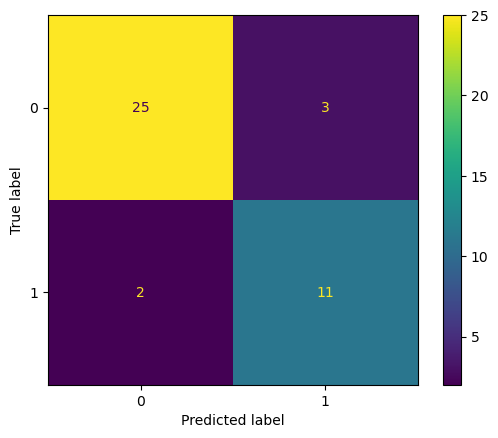


Evaluation: roc


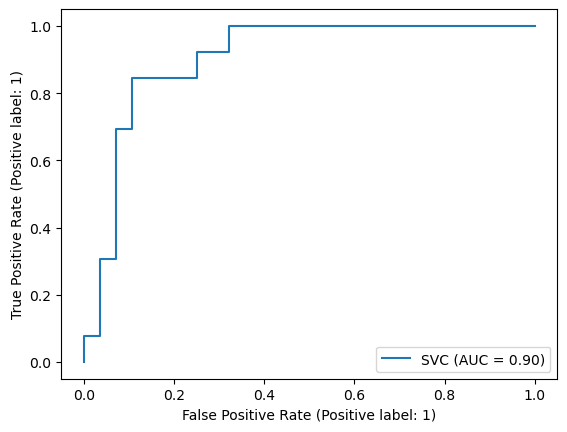

[(0.8023255813953489, 0.8148148148148148),
 (0.853448275862069, 0.8780487804878049),
 (0.92, 0.8461538461538461),
 (0.711340206185567, 0.7857142857142857)]

In [4]:
model_eval(svm_model, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [5]:
# define the grid for the hyperparameter search
grid_vals = { 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100],
            'degree': [1, 2, 3], 
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'class_weight': ['balanced', None]
            }


In [6]:
run_gridsearchCV(svm_model, grid_vals, X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=li

[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, 

[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.01, ker

[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total tim

[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=bala

[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, kernel=sigmoid; tota

[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear

[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degr

[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.0

[CV] END C=0.01, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s

[CV] END C=0.01, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0

[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=

[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END 

[CV] END C=0.1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, g

[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV

[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; t

[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.

[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time= 

[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel

[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=linear; total time=   0.0s

[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=1, kerne

[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[C

[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=1, kernel=p

[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV]

[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, cla

[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=line

[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, d

[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total

[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=bala

[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, deg

[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=poly; total t

[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1,

[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2

[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.1, kern

[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=100, kern

[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=

[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.8s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.6s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   1.5s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.6s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.9s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.8s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   1.1s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.8s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.7s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.4s
[CV] END C=10, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; total time=   0

[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=b

[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=sig

[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weigh

[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=100, kernel=

[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=poly; total ti

[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.3s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.6s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.7s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.5s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_w

[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; tot

[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weig

[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=1, kernel=sigmoi

[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamm

[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, cl

[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   3.6s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  10.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  16.7s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  10.4s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   9.7s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   6.5s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   8.3s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   6.4s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   4.3s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  21.4s
[CV] END C=100, class_weight=balanced, degree=1, gamma=100, kernel=sigmoid; tota

[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=1, k

[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=100, kernel=rbf; 

[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=1, kernel=rbf; total time

[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0

[CV] END C=100, class_weight=None, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END

[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=No

[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END

[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None,

[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, 

[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=

In [7]:
acc_best_model_grid = load_model(svm_model, 'f1_macro')
model_eval(acc_best_model_grid,X_train, X_test, y_train, y_test, confusion=True, roc=True)

Model is not saved.


AttributeError: 'NoneType' object has no attribute 'predict'

In [8]:
# run the grid search based on recall
run_gridsearchCV(svm_model, grid_vals, X_train, y_train, scoring='recall')

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=li


Evaluation: f1_score
73.33% for the train data
74.29% for the test data

Evaluation: accuracy_score
79.31% for the train data
78.05% for the test data

Evaluation: recall_score
88.00% for the train data
100.00% for the test data

Evaluation: precision_score
62.86% for the train data
59.09% for the test data

Evaluation: confusion_matrix


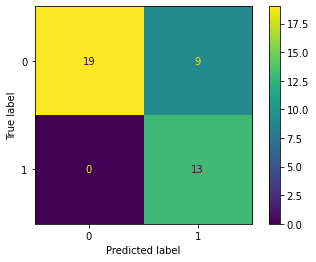


Evaluation: roc


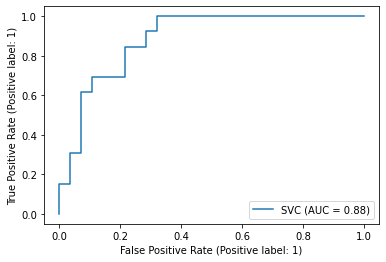

[(0.7333333333333334, 0.7428571428571429),
 (0.7931034482758621, 0.7804878048780488),
 (0.88, 1.0),
 (0.6285714285714286, 0.5909090909090909)]

In [9]:
# reload the best model & evaluate
acc_best_model_grid = load_model(svm_model, 'recall')
model_eval(acc_best_model_grid,X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [10]:
run_randomizedsearchCV(svm_model, grid_vals, X_train, y_train)

c:\Users\Tung\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 600 is smaller than n_iter=2400. Running 600 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=li


Evaluation: f1_score
75.17% for the train data
69.23% for the test data

Evaluation: accuracy_score
84.05% for the train data
80.49% for the test data

Evaluation: recall_score
74.67% for the train data
69.23% for the test data

Evaluation: precision_score
75.68% for the train data
69.23% for the test data

Evaluation: confusion_matrix


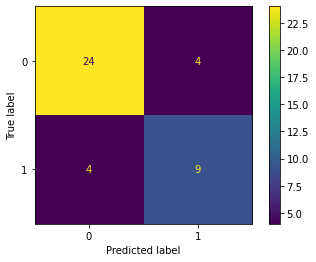


Evaluation: roc


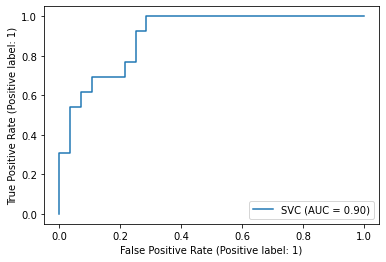

[(0.7516778523489932, 0.6923076923076923),
 (0.8405172413793104, 0.8048780487804879),
 (0.7466666666666667, 0.6923076923076923),
 (0.7567567567567568, 0.6923076923076923)]

In [11]:
# reload the best model & evaluate
rec_best_model = load_model(svm_model, 'f1_macro', search='random')
model_eval(rec_best_model,X_train, X_test, y_train, y_test, confusion=True, roc=True)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


c:\Users\Tung\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 600 is smaller than n_iter=2400. Running 600 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, 

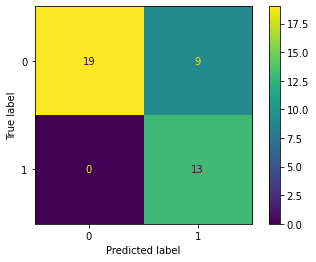


Evaluation: roc


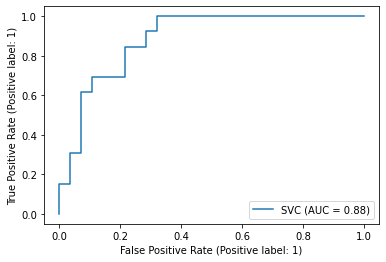

[(0.7333333333333334, 0.7428571428571429),
 (0.7931034482758621, 0.7804878048780488),
 (0.88, 1.0),
 (0.6285714285714286, 0.5909090909090909)]

In [12]:
run_randomizedsearchCV(svm_model, grid_vals, X_train, y_train, scoring='recall')
rec_best_model = load_model(svm_model, 'recall', search='random')
model_eval(rec_best_model,X_train, X_test, y_train, y_test, confusion=True, roc=True)

# 1) SVM with oversampled dataset


In [13]:
X_train2, X_test2, y_train2, y_test2 = load_train_test_oversampled()

A snippet of our training data:


Age  PhysicallyActive       BMI     Sleep  SoundSleep  JunkFood  Stress  \
0  0.0               2.0  1.354699  0.828180   -0.838128       0.0     1.0   
1  3.0               1.0  0.794063 -0.775318   -1.927694       1.0     3.0   
2  3.0               1.0  0.420306  0.828180    1.341005       0.0     0.0   
3  0.0               2.0  2.289092  0.828180   -0.838128       0.0     1.0   
4  0.0               1.0 -0.514087 -1.577067   -0.293345       3.0     1.0   

   BPLevel  Pregnancies  UrinationFreq  BMI_high  highBP_yes  \
0      1.0    -0.416387            1.0         1         0.0   
1      2.0    -0.416387            0.0         1         0.0   
2      1.0    -0.416387            1.0         1         0.0   
3      1.0    -0.416387            1.0         1         1.0   
4      1.0    -0.416387            0.0         0         0.0   

   RegularMedicine_yes  Pdiabetes_yes  Alcohol_yes  Gender_Male  Smoking_yes  \
0                  0.0            0.0          0.0          0.0          0.0   
1                  1.0            0.0          1.0          1.0          0.0   
2                  1.0            0.0          0.0          1.0          0.0   
3                  1.0            0.0          0.0          0.0          0.0   
4                  0.0            0.0          0.0          1.0          0.0   

   Family_Diabetes_yes  
0                  0.0  
1                  0.0  
2                  0.0  
3                  1.0  
4                  1.0

There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.


In [14]:
svm_model2 = sklearn.svm.SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced')
svm_model2.fit(X_train2, y_train2)

SVC(C=1, class_weight='balanced', gamma=0.1)

In [15]:
run_gridsearchCV(svm_model2, grid_vals, X_train2, y_train2, ros='ros')

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=li


Evaluation: f1_score
95.79% for the train data
43.14% for the test data

Evaluation: accuracy_score
95.74% for the train data
64.63% for the test data

Evaluation: recall_score
96.90% for the train data
42.31% for the test data

Evaluation: precision_score
94.70% for the train data
44.00% for the test data

Evaluation: confusion_matrix


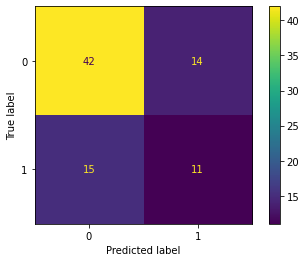


Evaluation: roc


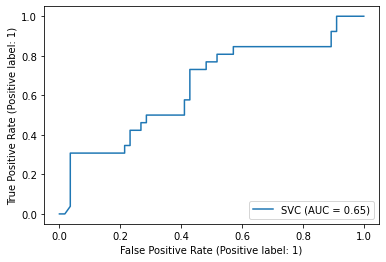

[(0.9578544061302682, 0.4313725490196078),
 (0.9573643410852714, 0.6463414634146342),
 (0.9689922480620154, 0.4230769230769231),
 (0.946969696969697, 0.44)]

In [16]:
acc_best_model_grid = load_model(svm_model2, 'f1_macro', ros='ros')
model_eval(acc_best_model_grid,X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=li

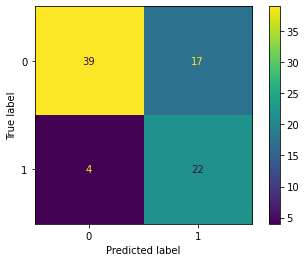


Evaluation: roc


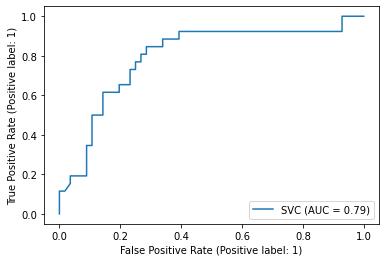

[(0.8571428571428571, 0.676923076923077),
 (0.8449612403100775, 0.7439024390243902),
 (0.9302325581395349, 0.8461538461538461),
 (0.7947019867549668, 0.5641025641025641)]

In [17]:
run_gridsearchCV(svm_model2, grid_vals, X_train2, y_train2, ros='ros', scoring='recall')
acc_best_model_grid = load_model(svm_model2, 'recall')
model_eval(acc_best_model_grid,X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

In [18]:
run_randomizedsearchCV(svm_model2, grid_vals, X_train2, y_train2, ros='ros')

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s


c:\Users\Tung\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 600 is smaller than n_iter=2400. Running 600 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, deg


Evaluation: f1_score
95.79% for the train data
43.14% for the test data

Evaluation: accuracy_score
95.74% for the train data
64.63% for the test data

Evaluation: recall_score
96.90% for the train data
42.31% for the test data

Evaluation: precision_score
94.70% for the train data
44.00% for the test data

Evaluation: confusion_matrix


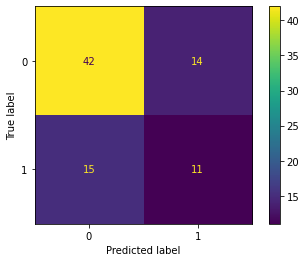


Evaluation: roc


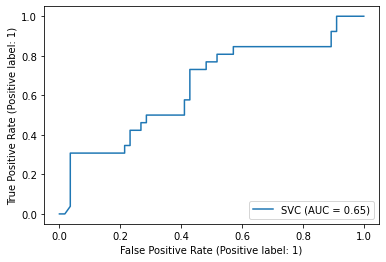

[(0.9578544061302682, 0.4313725490196078),
 (0.9573643410852714, 0.6463414634146342),
 (0.9689922480620154, 0.4230769230769231),
 (0.946969696969697, 0.44)]

In [19]:
# reload the best model & evaluate
rec_best_model_random2 = load_model(svm_model2, 'f1_macro', search='random', ros='ros')
model_eval(rec_best_model_random2,X_train2,X_test2,y_train2, y_test2, confusion=True, roc=True)

In [20]:
run_randomizedsearchCV(svm_model2, grid_vals, X_train2, y_train2, scoring='recall', ros='ros')

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s


c:\Users\Tung\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 600 is smaller than n_iter=2400. Running 600 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1,


Evaluation: f1_score
96.95% for the train data
53.85% for the test data

Evaluation: accuracy_score
96.90% for the train data
70.73% for the test data

Evaluation: recall_score
98.45% for the train data
53.85% for the test data

Evaluation: precision_score
95.49% for the train data
53.85% for the test data

Evaluation: confusion_matrix


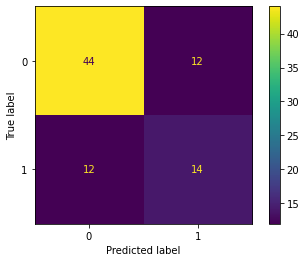


Evaluation: roc


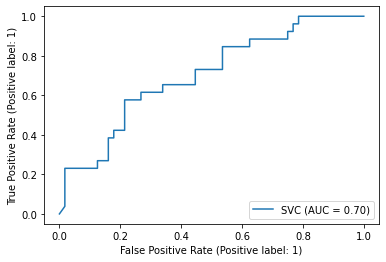

[(0.9694656488549618, 0.5384615384615384),
 (0.9689922480620154, 0.7073170731707317),
 (0.9844961240310077, 0.5384615384615384),
 (0.9548872180451128, 0.5384615384615384)]

In [21]:
rec_best_model = load_model(svm_model2, 'recall', search='random', ros='ros')
model_eval(rec_best_model,X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)